170498071/170498071 [==============================] - 9s 0us/step
Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.5187 - accuracy: 0.4439 - val_loss: 1.2262 - val_accuracy: 0.5652
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1613 - accuracy: 0.5888 - val_loss: 1.0435 - val_accuracy: 0.6302
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0122 - accuracy: 0.6448 - val_loss: 0.9912 - val_accuracy: 0.6517
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9193 - accuracy: 0.6764 - val_loss: 0.9515 - val_accuracy: 0.6689
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8481 - accuracy: 0.7049 - val_loss: 0.8960 - val_accuracy: 0.6846
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7915 - accuracy: 0.7223 - val_loss: 0.9483 - val_accuracy: 0.6765
Epoch 7/10
1563/1563 [==============================] - 7

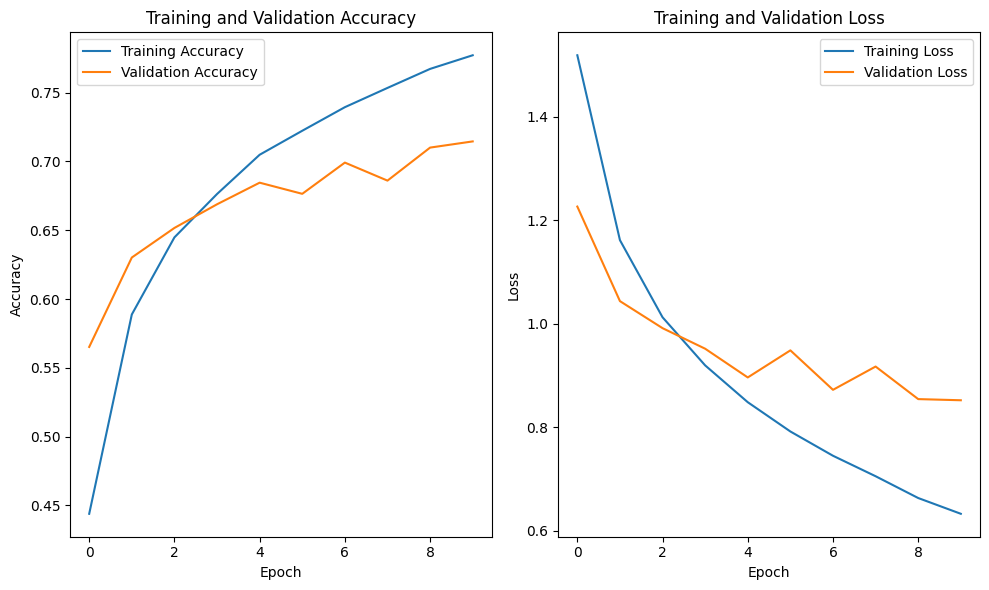

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer, no activation for now (we'll use softmax later)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')
predictions = model.predict(test_images)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')

Saving pexels-pixabay-45201.jpg to pexels-pixabay-45201 (1).jpg
Uploaded file: pexels-pixabay-45201 (1).jpg


In [7]:
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')


Saving pexels-davidohboy-8074482.jpg to pexels-davidohboy-8074482.jpg
Uploaded file: pexels-davidohboy-8074482.jpg


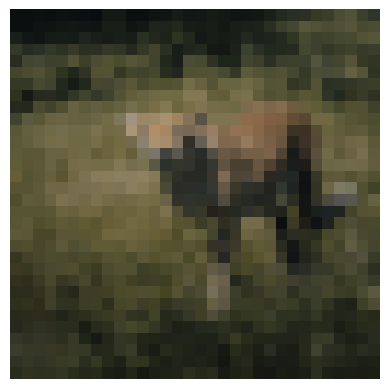

1/1 [==============================] - 0s 36ms/step
Predicted Class: 4
Probability: 0.8869


In [13]:
from PIL import Image
input_shape = (32, 32)
resized_image = Image.fromarray(image).resize(input_shape)
image_array = np.array(resized_image) / 255.
plt.imshow(image_array)
plt.axis('off')
plt.show()
input_image = np.expand_dims(image_array, axis=0)
predictions = model.predict(input_image)
probabilities = tf.nn.softmax(predictions[0])
predicted_class = np.argmax(probabilities)
print(f'Predicted Class: {predicted_class}')
print(f'Probability: {probabilities[predicted_class]:.4f}')

#RESULT OF LESS CLASSES IN A DATASET..THE DATASET HAD NO CHEETAH CLASSIFIER. THE NEAREST ONES WERE DEER AND CAT AND IT HAS CLASSIFIED TO CLASS 4 WHICH IS DEER LEADING TO INCORRECT PREDICTION

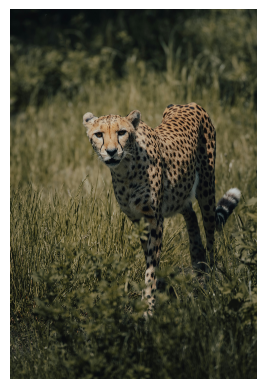

In [8]:
import matplotlib.pyplot as plt
import numpy as np
uploaded_image_path = list(uploaded.keys())[0]
image = plt.imread(uploaded_image_path)
plt.imshow(image)
plt.axis('off')
plt.show()


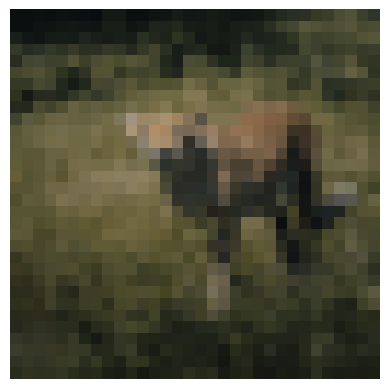

1/1 [==============================] - 0s 29ms/step
Predicted Class: 4
Probability: 0.8869


In [9]:
from PIL import Image
input_shape = (32, 32)
resized_image = Image.fromarray(image).resize(input_shape)
image_array = np.array(resized_image) / 255.0
plt.imshow(image_array)
plt.axis('off')
plt.show()
input_image = np.expand_dims(image_array, axis=0)
predictions = model.predict(input_image)
probabilities = tf.nn.softmax(predictions[0])
predicted_class = np.argmax(probabilities)
print(f'Predicted Class: {predicted_class}')
print(f'Probability: {probabilities[predicted_class]:.4f}')


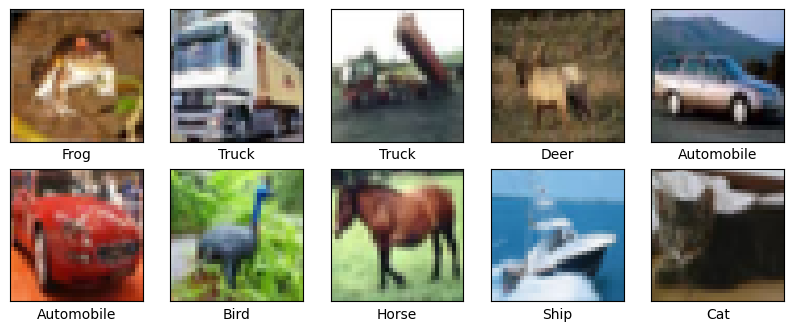

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot images from CIFAR-10 dataset
def plot_cifar_images(images, labels, class_names, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        # CIFAR-10 labels are arrays, need to extract index for class names
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

# Display some sample images
plot_cifar_images(train_images, train_labels, class_names)
